### Import Necessary Libraries

In [146]:
#Creation of Numpy Arrays,Scientific computing and linear Algebra.  
import numpy as np     

#For Loading DataSet,Data Manipulation,Data cleaning and Stastics Analysis.
import pandas as pd

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Dataset

In [147]:
data=pd.read_csv("/content/formability_database1.csv") # Add path to dataset

In [148]:
data.head()

,functional group,A,A_OS,A',A'_OS,A_HOMO-,A_HOMO+,A_IE-,A_IE+,A_LUMO-,...,B_e_affin-,B_e_affin+,X1,X1_OS,μ,μĀ,μ𝐵 ̅,t,type,Perovskite
0,RbTaO3,Rb,1,Rb,1,0.0,-4.492,0.0,806.0,0.0,...,0.0,28.0,O,-2,0.4571,0.0,0.0000,1.0815,ABO3,1
1,Ba2PrIrO6,Ba,2,Ba,2,0.0,-6.470,0.0,1005.8,0.0,...,-101.0,201.0,O,-2,0.5268,0.0,0.0804,0.9957,A2BB'O6,1
2,Ba2PrOsO6,Ba,2,Ba,2,0.0,-6.470,0.0,1005.8,0.0,...,-56.0,156.0,O,-2,0.5286,0.0,0.0786,0.9946,A2BB'O6,1
3,Ba2SmIrO6,Ba,2,Ba,2,0.0,-6.470,0.0,1005.8,0.0,...,-101.0,201.0,O,-2,0.4661,0.0,0.0196,1.0370,A2BB'O6,1
4,Ba2TbIrO6,Ba,2,Ba,2,0.0,-6.470,0.0,1005.8,0.0,...,-101.0,201.0,O,-2,0.4946,0.0,0.0482,1.0172,A2BB'O6,1


In [149]:
# First step converting string to numeric
from sklearn.preprocessing import LabelEncoder# Label encoder to convert string into binary for computations
labelencoder_y=LabelEncoder()

y_col = input("Enter target column name : -")
# Our Y column target attribute
y = data[y_col]
y = labelencoder_y.fit_transform(y)

# Our X column features 
X=data.drop([y_col],axis=1)

# Converting columns into numeric through label encoder but we already have numeric set of features.
strings  =  X.select_dtypes('object')
for i in strings.columns:
    X[i] = labelencoder_y.fit_transform(X[i].to_numpy().reshape(-1,1))

X

Enter target column name : -Perovskite


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,functional group,A,A_OS,A',A'_OS,A_HOMO-,A_HOMO+,A_IE-,A_IE+,A_LUMO-,...,B_Z_radii+,B_e_affin-,B_e_affin+,X1,X1_OS,μ,μĀ,μ𝐵 ̅,t,type
0,1095,34,1,34,1,0.000,-4.492,0.0,806.0,0.000,...,5.580,0.0,28.0,0,-2,0.4571,0.0000,0.0000,1.0815,3
1,194,3,2,3,2,0.000,-6.470,0.0,1005.8,0.000,...,7.108,-101.0,201.0,0,-2,0.5268,0.0000,0.0804,0.9957,0
2,196,3,2,3,2,0.000,-6.470,0.0,1005.8,0.000,...,7.130,-56.0,156.0,0,-2,0.5286,0.0000,0.0786,0.9946,0
3,215,3,2,3,2,0.000,-6.470,0.0,1005.8,0.000,...,6.768,-101.0,201.0,0,-2,0.4661,0.0000,0.0196,1.0370,0
4,232,3,2,3,2,0.000,-6.470,0.0,1005.8,0.000,...,6.518,-101.0,201.0,0,-2,0.4946,0.0000,0.0482,1.0172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,1486,44,3,44,3,0.000,-6.058,0.0,1206.8,0.000,...,4.400,206.0,106.0,0,-2,0.4357,0.0000,0.0571,0.9203,0
1501,1487,44,3,44,3,0.000,-6.058,0.0,1206.8,0.000,...,4.785,55.0,257.0,0,-2,0.4679,0.0000,0.0250,0.9001,0
1502,660,17,3,3,2,1.067,-5.403,89.5,1095.3,0.503,...,4.040,0.0,127.6,0,-2,0.4071,0.1193,0.0286,1.0205,1
1503,708,21,1,22,3,0.555,-5.215,-119.3,956.9,2.088,...,4.955,-128.6,28.6,0,-2,0.4518,0.0768,0.0089,1.0202,2


### Shape of the Dataset.

In [150]:
data.shape

(1505, 41)

### Displaying the Column Names

In [151]:
data.columns

Index(['functional group', 'A', 'A_OS', 'A'', 'A'_OS', 'A_HOMO-', 'A_HOMO+',
       'A_IE-', 'A_IE+', 'A_LUMO-', 'A_LUMO+', 'A_X-', 'A_X+', 'A_Z_radii-',
       'A_Z_radii+', 'A_e_affin-', 'A_e_affin+', 'B', 'B_OS', 'B'', 'B'_OS',
       'B_HOMO-', 'B_HOMO+', 'B_IE-', 'B_IE+', 'B_LUMO-', 'B_LUMO+', 'B_X-',
       'B_X+', 'B_Z_radii-', 'B_Z_radii+', 'B_e_affin-', 'B_e_affin+', 'X1',
       'X1_OS', 'μ', 'μĀ', 'μ𝐵 ̅', 't', 'type', 'Perovskite'],
      dtype='object')

### Finding Stastical Summary

In [152]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
A_OS,1505.0,2.307641,0.569949,1.0000,2.0000,2.0000,3.0000,3.0000
A'_OS,1505.0,2.334219,0.565455,1.0000,2.0000,2.0000,3.0000,3.0000
A_HOMO-,1505.0,-0.004070,0.153572,-2.3090,0.0000,0.0000,0.0000,1.3350
A_HOMO+,1505.0,-6.369608,1.483643,-13.6300,-7.0560,-6.4700,-5.7700,0.0000
A_IE-,1505.0,-0.296013,13.693089,-200.4000,0.0000,0.0000,0.0000,212.6000
A_IE+,1505.0,1126.216678,150.961476,751.4000,1041.0000,1099.0000,1179.6000,2014.0000
A_LUMO-,1505.0,0.025264,0.323846,-2.1490,0.0000,0.0000,0.0000,2.1490
A_LUMO+,1505.0,-3.607706,1.427382,-8.7240,-4.2940,-3.8960,-2.5740,0.0000
A_X-,1505.0,-0.002193,0.074680,-1.1300,0.0000,0.0000,0.0000,1.4400
A_X+,1505.0,2.269236,0.690959,1.5800,1.9000,2.0000,2.3400,4.6600


### Finding Duplicates rows.

In [153]:
data.duplicated().any()

False

There is no duplicate rows in the dataset

### Finding Column Names,Non-Null values and Datatypes.

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   functional group  1505 non-null   object 
 1   A                 1505 non-null   object 
 2   A_OS              1505 non-null   int64  
 3   A'                1505 non-null   object 
 4   A'_OS             1505 non-null   int64  
 5   A_HOMO-           1505 non-null   float64
 6   A_HOMO+           1505 non-null   float64
 7   A_IE-             1505 non-null   float64
 8   A_IE+             1505 non-null   float64
 9   A_LUMO-           1505 non-null   float64
 10  A_LUMO+           1505 non-null   float64
 11  A_X-              1505 non-null   float64
 12  A_X+              1505 non-null   float64
 13  A_Z_radii-        1505 non-null   float64
 14  A_Z_radii+        1505 non-null   float64
 15  A_e_affin-        1505 non-null   float64
 16  A_e_affin+        1505 non-null   float64


### Finding Nullvalues.

In [155]:
data.isnull().any()

functional group    False
A                   False
A_OS                False
A'                  False
A'_OS               False
A_HOMO-             False
A_HOMO+             False
A_IE-               False
A_IE+               False
A_LUMO-             False
A_LUMO+             False
A_X-                False
A_X+                False
A_Z_radii-          False
A_Z_radii+          False
A_e_affin-          False
A_e_affin+          False
B                   False
B_OS                False
B'                  False
B'_OS               False
B_HOMO-             False
B_HOMO+             False
B_IE-               False
B_IE+               False
B_LUMO-             False
B_LUMO+             False
B_X-                False
B_X+                False
B_Z_radii-          False
B_Z_radii+          False
B_e_affin-          False
B_e_affin+          False
X1                  False
X1_OS               False
μ                   False
μĀ                  False
μ𝐵 ̅                False
t           

### Finding data types

In [156]:
data.dtypes

functional group     object
A                    object
A_OS                  int64
A'                   object
A'_OS                 int64
A_HOMO-             float64
A_HOMO+             float64
A_IE-               float64
A_IE+               float64
A_LUMO-             float64
A_LUMO+             float64
A_X-                float64
A_X+                float64
A_Z_radii-          float64
A_Z_radii+          float64
A_e_affin-          float64
A_e_affin+          float64
B                    object
B_OS                  int64
B'                   object
B'_OS                 int64
B_HOMO-             float64
B_HOMO+             float64
B_IE-               float64
B_IE+               float64
B_LUMO-             float64
B_LUMO+             float64
B_X-                float64
B_X+                float64
B_Z_radii-          float64
B_Z_radii+          float64
B_e_affin-          float64
B_e_affin+          float64
X1                   object
X1_OS                 int64
μ                   

### Describing Dataset with object Datatype.

In [157]:
data.select_dtypes(include=['object'])

,functional group,A,A',B,B',X1,type
0,RbTaO3,Rb,Rb,Ta,Ta,O,ABO3
1,Ba2PrIrO6,Ba,Ba,Pr,Ir,O,A2BB'O6
2,Ba2PrOsO6,Ba,Ba,Pr,Os,O,A2BB'O6
3,Ba2SmIrO6,Ba,Ba,Sm,Ir,O,A2BB'O6
4,Ba2TbIrO6,Ba,Ba,Tb,Ir,O,A2BB'O6
...,...,...,...,...,...,...,...
1500,Yb2NiMnO6,Yb,Yb,Ni,Mn,O,A2BB'O6
1501,Yb2NiRuO6,Yb,Yb,Ni,Ru,O,A2BB'O6
1502,GdBaCo2O6,Gd,Ba,Co,Co,O,AA'B2O6
1503,"KLaMnWO6,",K,La,Mn,W,O,AA'BB'O6


### Converting Object Datatype to Numerical Datatype.

### After Converting Checking the datatypes.

In [158]:
data.dtypes

functional group     object
A                    object
A_OS                  int64
A'                   object
A'_OS                 int64
A_HOMO-             float64
A_HOMO+             float64
A_IE-               float64
A_IE+               float64
A_LUMO-             float64
A_LUMO+             float64
A_X-                float64
A_X+                float64
A_Z_radii-          float64
A_Z_radii+          float64
A_e_affin-          float64
A_e_affin+          float64
B                    object
B_OS                  int64
B'                   object
B'_OS                 int64
B_HOMO-             float64
B_HOMO+             float64
B_IE-               float64
B_IE+               float64
B_LUMO-             float64
B_LUMO+             float64
B_X-                float64
B_X+                float64
B_Z_radii-          float64
B_Z_radii+          float64
B_e_affin-          float64
B_e_affin+          float64
X1                   object
X1_OS                 int64
μ                   

In [159]:
X.head()

,functional group,A,A_OS,A',A'_OS,A_HOMO-,A_HOMO+,A_IE-,A_IE+,A_LUMO-,...,B_Z_radii+,B_e_affin-,B_e_affin+,X1,X1_OS,μ,μĀ,μ𝐵 ̅,t,type
0,1095,34,1,34,1,0.0,-4.492,0.0,806.0,0.0,...,5.580,0.0,28.0,0,-2,0.4571,0.0,0.0000,1.0815,3
1,194,3,2,3,2,0.0,-6.470,0.0,1005.8,0.0,...,7.108,-101.0,201.0,0,-2,0.5268,0.0,0.0804,0.9957,0
2,196,3,2,3,2,0.0,-6.470,0.0,1005.8,0.0,...,7.130,-56.0,156.0,0,-2,0.5286,0.0,0.0786,0.9946,0
3,215,3,2,3,2,0.0,-6.470,0.0,1005.8,0.0,...,6.768,-101.0,201.0,0,-2,0.4661,0.0,0.0196,1.0370,0
4,232,3,2,3,2,0.0,-6.470,0.0,1005.8,0.0,...,6.518,-101.0,201.0,0,-2,0.4946,0.0,0.0482,1.0172,0


### Spittng the dataset and choosing the Target Column

### Heatmap For Correlation

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119861 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 119861 missing from current font.
  font.set_text(s, 0, flags=flags)


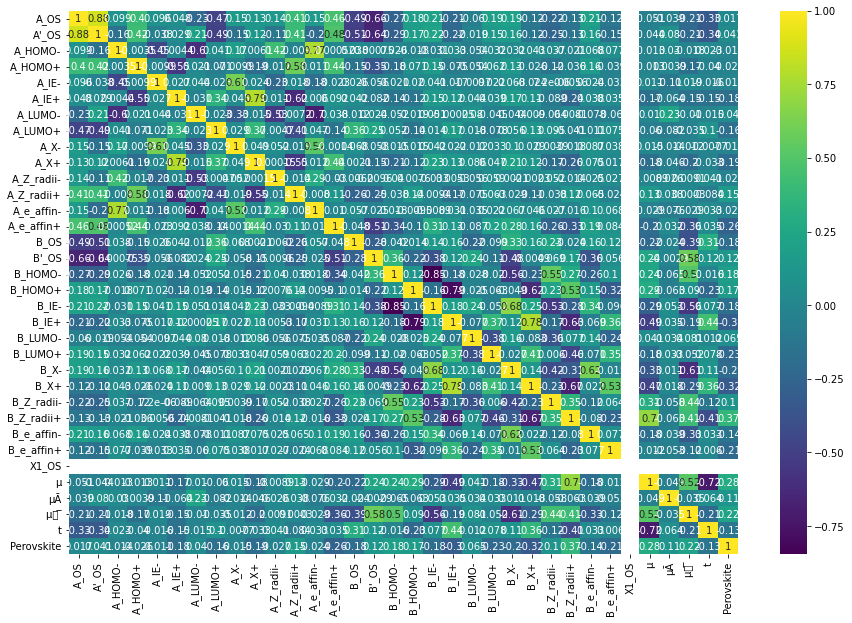

In [160]:
plt.figure(figsize=(15,10))
sns.heatmap(data= data.corr(), annot=True, cmap='viridis')        

### Correlation with independent variable

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [162]:
# Standard Scalar to allocate them in range
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X = sc_X.fit_transform(X)

In [163]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=12).fit_transform(X, y)
X_new.shape

(1505, 12)

### Splitting data train and test

In [164]:

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1204, 12), X_test size: (301, 12)


### Feature Scaling

In [165]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

### RandomForestClassifier

In [167]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy of the Random Forest:",metrics.accuracy_score(y_test, y_pred))
rfc_cv_score = cross_val_score(clf, X, y, cv=5)


Accuracy of the Random Forest: 0.8903654485049833


### Creating a confusion matrix

In [168]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 40,  24],
       [  9, 228]])

### classification_report

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.62      0.71        64
           1       0.90      0.96      0.93       237

    accuracy                           0.89       301
   macro avg       0.86      0.79      0.82       301
weighted avg       0.89      0.89      0.88       301



### roc_auc_score

In [170]:
FP, TP, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score for RandomForestClassifier: ', roc_auc_score(y_test, y_pred))

roc_auc_score for RandomForestClassifier:  0.7935126582278482


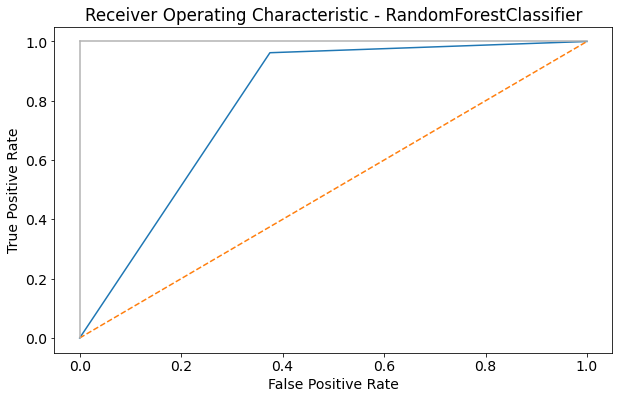

In [171]:
plt.subplots(1, figsize=(10,6))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"),
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Precision-Recall Curve

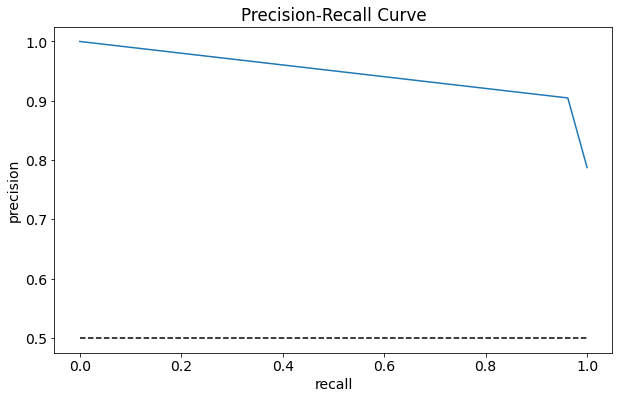

In [172]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.figure(figsize = (10,6))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall Curve')
plt.show()